In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Two-qubit quantum circuits and entangled states



## Coding cheat sheet:

Defining a quantum circuit: 

`qc = QuantumCircuit(1)` Define a 1 qubit quantum circuit <br>

`qc.x(0)` Add an X gate <br>
`qc.h(0)` Add an H gate <br>
`qc.z(0)` Add a Z gate <br>
`qc.y(0)` Add a Y gate <br>

`qc.draw()` Draw the circuit <br>

Find the output of a quantum circuit:<br>

`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>


See the output on the Bloch sphere:<br>
`state = result.get_statevector()` <br>
`plot_bloch_multivector(state)`<br>


See the output in histogram form: <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

Using a real quantum computer:

`job = execute(qc, backend=backend, shots=100)` <br>
`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 



## 2 qubit quantum circuits


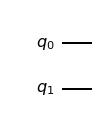

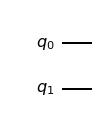

In [2]:
# BLOCK 1  - Define and draw a 2-qubit quantum circuit and draw it. Don't add any gates yet.

qc=QuantumCircuit(2)
qc.draw()

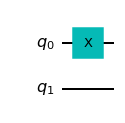

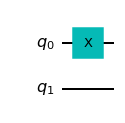

In [5]:
# BLOCK 2 - Define a 2-qubit quantum circuit and add an X-gate to q0. Draw the circuit.

qc=QuantumCircuit(2)
qc.x(0)
qc.draw()

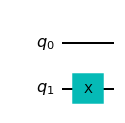

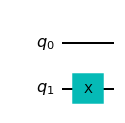

In [8]:
# BLOCK 3 - Define a 2-qubit quantum circuit and add an X-gate to q1. Draw the circuit.
qc=QuantumCircuit(2)
qc.x(1)
qc.draw()

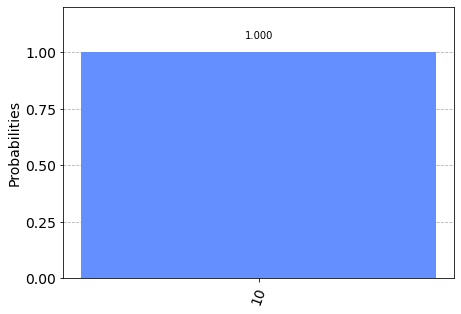

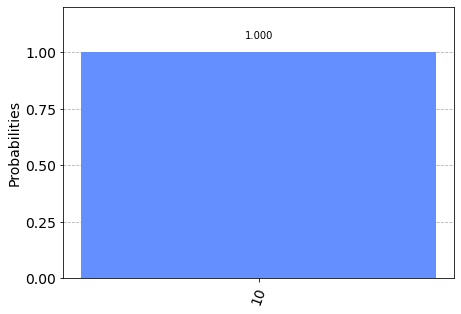

In [10]:
# BLOCK 4 - Find the histogram form of the output of the quantum circuit from BLOCK 3.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

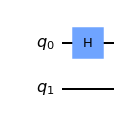

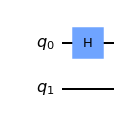

In [13]:
# BLOCK 5 - Define a 2-qubit quantum circuit and add an H gate to q0. Draw the circuit.
qc=QuantumCircuit(2)
qc.h(0)
qc.draw()

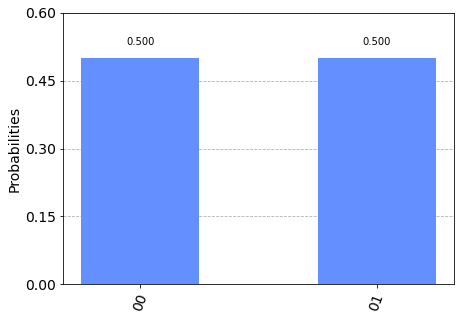

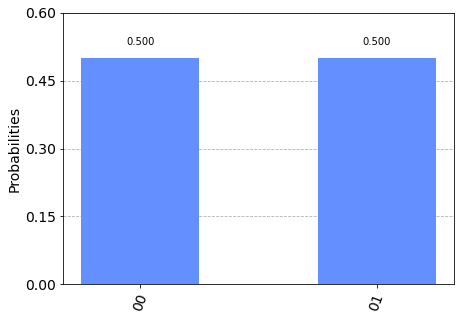

In [14]:
# BLOCK 6 - Plot the histogram for the quantum circuit above.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

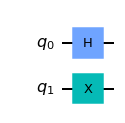

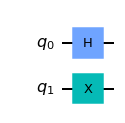

In [15]:
# BLOCK 7 - Define a 2-qubit quantum circuit and add an H gate to q0 and an X gate to q1. Draw the circuit.
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

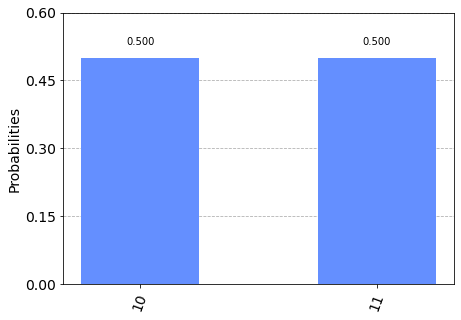

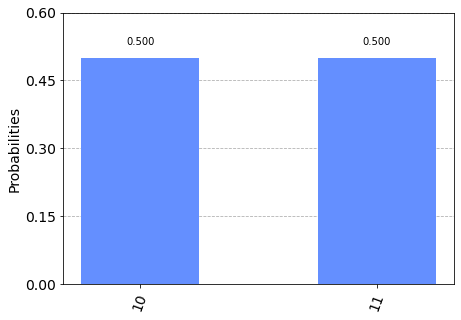

In [17]:
# BLOCK 8 - Plot the histogram for the quantum circuit above.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

## The CNOT gate


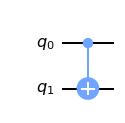

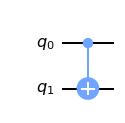

In [18]:
# BLOCK 9 - Run this cell to see how to use the CNOT gate

qc=QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

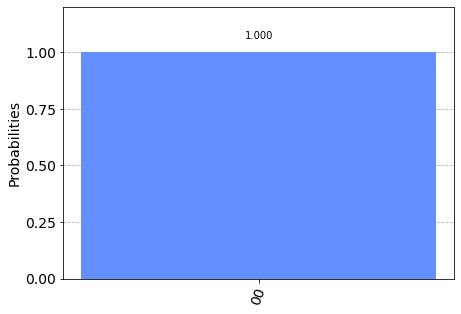

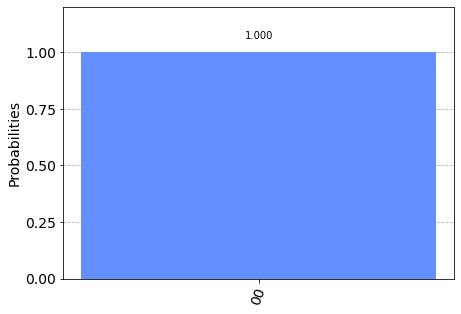

In [19]:
# BLOCK 10 - Plot the histogram of the quantum circuit above.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

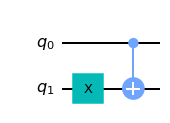

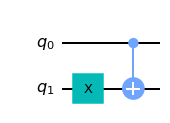

In [21]:
# BLOCK 11 - Define a 2 qubit quantum circuit with an X gate on q1, 
# followed by a CX gate with q0 as the control qubit and q1 as the target qubit.
# Draw the circuit
qc=QuantumCircuit(2)
qc.x(1)
qc.cx(0,1)
qc.draw()

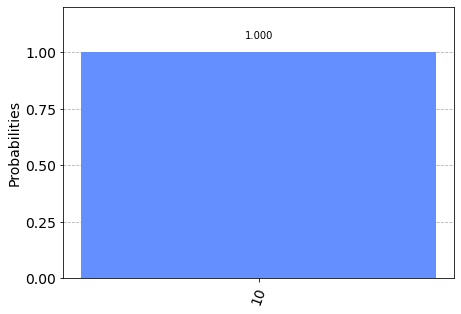

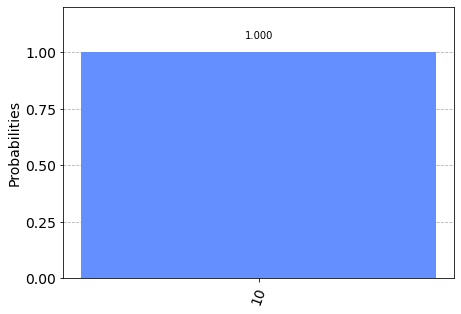

In [22]:
# BLOCK 12 - Plot the histogram of the quantum circuit above.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

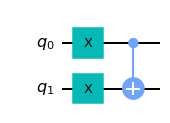

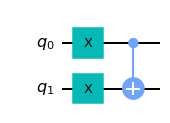

In [23]:
# BLOCK 13 - Create a 2 qubit quantum circuit with X gates on both q1 and q0, 
# followed by a CX gate with q0 as the control qubit and q1 as the target qubit.
# Plot the histogram of this quantum circuit.
qc=QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.draw()

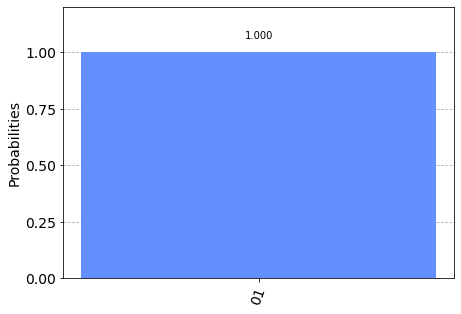

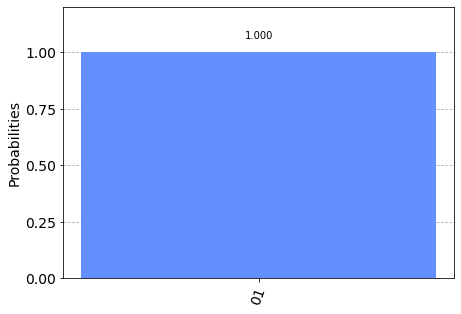

In [24]:
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

## Using a real quantum computer

In [42]:
# BLOCK 14 - Import libraries and find the least busy quantum computer

#Import IBMQ
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

#ask for the least busy quantum computer
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
#tell us what the least busy one is
print("least busy backend: ", backend)

# send the job to a quantum computer
job = execute(qc, backend=backend, shots=100)
result = job.result()


least busy backend:  ibmq_lima


## Optional content - entanglement

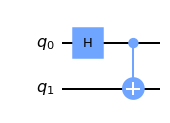

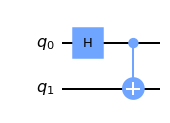

In [45]:
# BLOCK 16 - Create a 2-qubit quantum circuit with an H gate on the first qubit
# followed by a CX gate (q0 = control, q1 = target)
# plot the result as a histogram
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

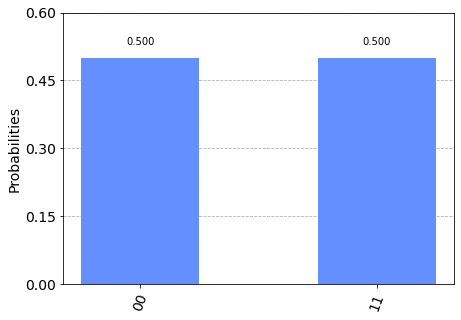

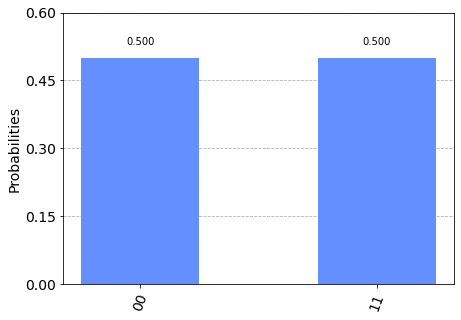

In [34]:
# BLOCK 17 - Run the above circuit on a quantum computer. Is there anything unexpected about the result?
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

# See the output in histogram form:
counts = result.get_counts(qc)
plot_histogram(counts)

In [ ]:
# BLOCK 17 - In Block 16, we made an entangled state where both qubits were |0> or both qubits were |..
# can you make an entangled state where both qubits are always in opposite states (if one is |0> the other will be |1>)?

